# Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statistics as st
import tqdm

# Wellcoming Data

In [7]:
data=pd.read_csv('Data analyst Task.csv')
#unneeded user and orders
data=data.drop([0,1,2,3,4],axis=0).reset_index(drop=True)


created_at=[]
for index in data.index:
    m=data.created_at[index]
    created_at.append(datetime.date(int(m[index][-4:]),int(m[:m.find('/')]),int(m[m.find('/')+1:m.find('/',3)])))
data['created_at']=created_at

data.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,6,6,2022-01-01,0,NaN,10000
1,7,7,2022-01-01,0,NaN,29500
2,8,8,2022-01-01,10000,1.0,10000
3,9,9,2022-01-01,0,NaN,5000
4,10,10,2022-01-01,0,NaN,35000


# ONE
## Plotting # order by month

In [25]:
mon=[]
for item in data.created_at:
    a=item.month
    if a not in mon:
        mon.append(a) 
mon

[1, 2, 3, 4, 5, 6, 7]

In [20]:
data.created_at[0].month

1

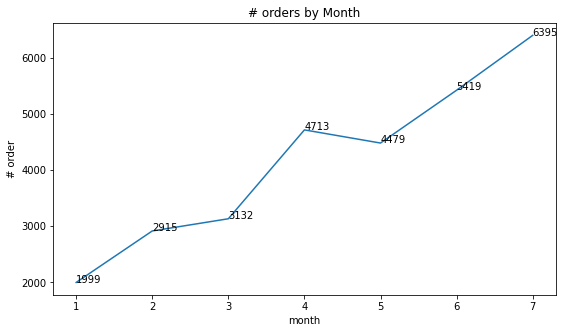

In [109]:
count=[]
for item in data.month.unique():
count.append(list(data.month).count(item))
plt.figure(figsize=(9,5))
plt.plot(count)
for i in count:
    plt.text(count.index(i),i,s=i)
plt.title('# orders by Month')
plt.ylabel('# order')
plt.xlabel('month')
plt.xticks(ticks=range(7),labels=[1,2,3,4,5,6,7])
plt.show()

## Plotting sum of basket by month

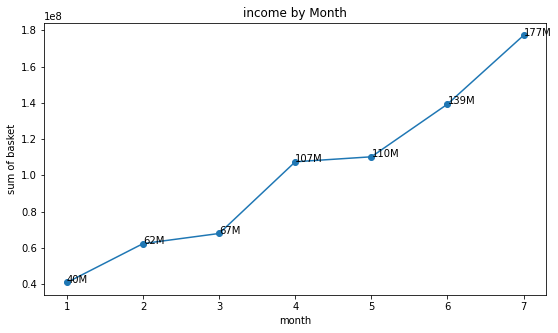

In [133]:
basket=[]
for item in data.month.unique():
    temp=data[data.month==item]
    basket.append(sum(temp.basket.tolist()))


plt.figure(figsize=(9,5))
plt.plot(basket)
plt.scatter(range(7),basket)
for i in basket:
    plt.text(basket.index(i),i,s=str(i)[:-6]+'M')
plt.title('income by Month')
plt.ylabel('sum of basket')
plt.xlabel('month')
plt.xticks(ticks=range(7),labels=[1,2,3,4,5,6,7])
plt.show()

## plotting # orders by day

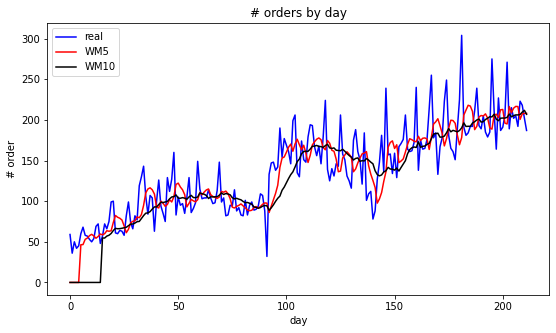

In [191]:
count=[]
for item in data.created_at.unique():
    count.append(list(data.created_at).count(item))

plt.figure(figsize=(9,5))
plt.plot(count,color='blue')
#to plot weighted mean
def wm(list,time_window):
    w_list=[]
    for i in range(time_window):
        w_list.append(0)
    for index in range(len(count)-time_window):
        w_list.append(st.mean(count[index:index+time_window]))
    return w_list
plt.plot(wm(count,5),color='red')
plt.plot(wm(count,15),color='black')

plt.title('# orders by day')
plt.ylabel('# order')
plt.xlabel('day')
plt.legend(['real','WM5','WM10'])
plt.show()

## Outliers of weekends

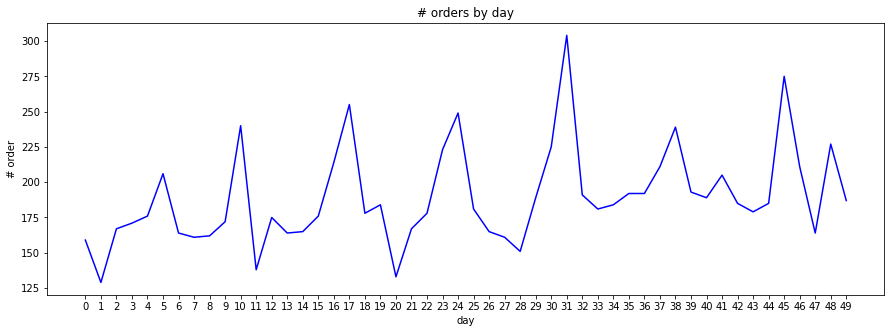

In [190]:
count=[]
day=[]
for item in data.created_at.unique():
    count.append(list(data.created_at).count(item))
    day.append(item)
plt.figure(figsize=(15,5))
plt.plot(count[150:200],color='blue')

plt.title('# orders by day')
plt.ylabel('# order')
plt.xlabel('day')
plt.xticks(labels=range(50),ticks=range(50))
plt.show()

## new users order

In [213]:
new_user=[]
for item in tqdm.tqdm(range(len(data))):
    temp=list(data.user_id[0:item])
    if data.user_id[item] in temp:
        new_user.append(0)
    else: new_user.append(1)

data['new_user']=new_user

100%|██████████| 29052/29052 [01:29<00:00, 324.96it/s]


In [234]:
mean_new_user_orders=[0]
for month in range(1,8):
    temp=data[data.month==month]
    new_user=list(temp[temp.new_user==1].user_id)
    temp2=data[data.month==month+1]
    order_new_user=[]
    for i in new_user:
        order_new_user.append(list(temp2.user_id).count(i))
    mean_new_user_orders.append(st.mean(order_new_user))

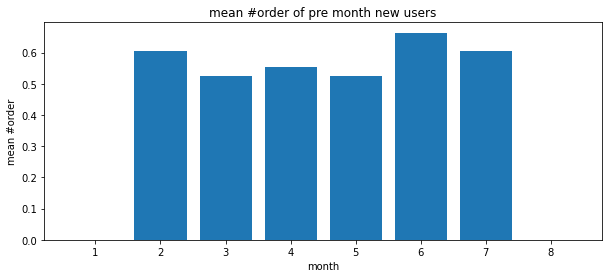

In [240]:
plt.figure(figsize=(10,4))
plt.bar(range(8),mean_new_user_orders)
plt.xticks(ticks=range(8),labels=[1,2,3,4,5,6,7,8])
plt.title('mean #order of pre month new users')
plt.xlabel('month')
plt.ylabel('mean #order')
plt.show()

In [245]:
mean_new_user_orders=[0]
for month in range(1,8):
    temp=data[data.month==month]
    new_user=list(temp[temp.new_user==1].user_id)
    temp2=data[data.month==month+1]
    order_new_user=[0]
    for i in new_user:
        c=list(temp2.user_id).count(i)
        if c !=0:
            order_new_user.append(c)
    mean_new_user_orders.append(st.mean(order_new_user))

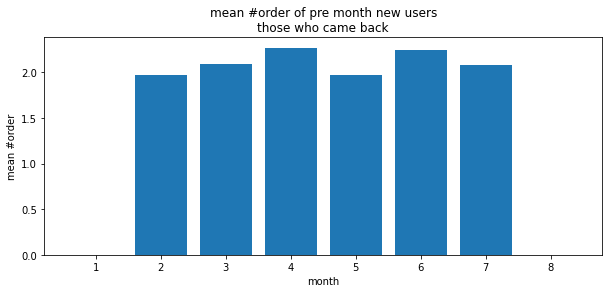

In [248]:
plt.figure(figsize=(10,4))
plt.bar(range(8),mean_new_user_orders)
plt.xticks(ticks=range(8),labels=[1,2,3,4,5,6,7,8])
plt.title('mean #order of pre month new users\nthose who came back')
plt.xlabel('month')
plt.ylabel('mean #order')
plt.show()

In [256]:
st.mean(mean_new_user_orders[1:7])

2.106444885004326

## retention rate of new users by month

In [326]:
retention_rate=[]
for month in range(1,8):
    df=data[data.month==month]
    df=df[df.new_user==1]
    new_user=list(df.user_id)
    df=data[data.month==month+1]
    rr=0
    for i in new_user:
        if i in list(df.user_id):
            rr+=1
    print(month , rr/len(new_user))
    retention_rate.append(rr/len(new_user))
st.mean(retention_rate[:6])

1 0.3063002680965147
2 0.25016244314489927
3 0.24324324324324326
4 0.26444723618090454
5 0.2953020134228188
6 0.28990694345025053
7 0.0


0.27489369125643853

# TWO

## difference between off type 1 and 2

In [272]:
basket_NoOff=[]
for index in data.index:
    basket_NoOff.append(data.basket[index]+data.discount_cost[index])
data['basket_nooff']=basket_NoOff

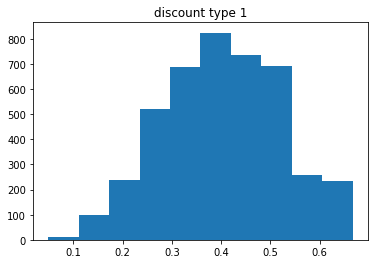

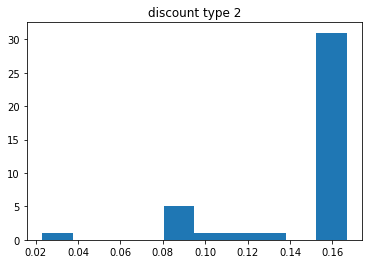

In [287]:
# because we want to study new users
#discount type 1
temp=data[data.new_user==1]
temp=temp[temp.discount_type==1]
off_percent=[]
for index in temp.index:
    off_percent.append(temp.discount_cost[index]/temp.basket_nooff[index])
plt.hist(off_percent)
plt.title('discount type 1')
plt.show()

#discount type 2
temp=data[data.new_user==1]
temp=temp[temp.discount_type==2]
off_percent=[]
for index in temp.index:
    off_percent.append(temp.discount_cost[index]/temp.basket_nooff[index])
plt.hist(off_percent)
plt.title('discount type 2')
plt.show()

## basket size by discount type

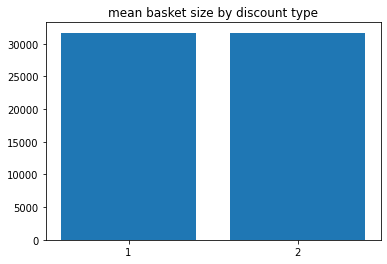

In [305]:
df=data[data.new_user==1]
df=df[df.discount_type==1]

df2=data[data.new_user==1]
df2=df2[df2.discount_type==2]

plt.bar([1,2],[st.mean(df.basket_nooff),st.mean(df2.basket_nooff)])
plt.xticks([1,2],[1,2])
plt.title('mean basket size by discount type')
plt.show()

## discount type by the old users
it doesnt seem to be so different

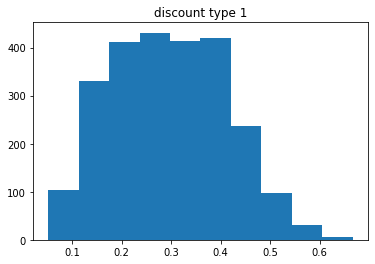

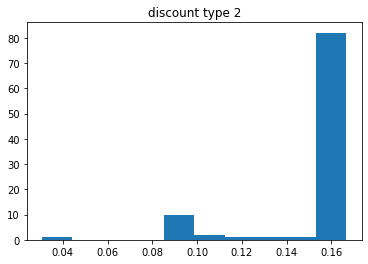

In [306]:
# because we want to study new users
#discount type 1
temp=data[data.new_user==0]
temp=temp[temp.discount_type==1]
off_percent=[]
for index in temp.index:
    off_percent.append(temp.discount_cost[index]/temp.basket_nooff[index])
plt.hist(off_percent)
plt.title('discount type 1')
plt.show()

#discount type 2
temp=data[data.new_user==0]
temp=temp[temp.discount_type==2]
off_percent=[]
for index in temp.index:
    off_percent.append(temp.discount_cost[index]/temp.basket_nooff[index])
plt.hist(off_percent)
plt.title('discount type 2')
plt.show()

# THREE

In [370]:
order_count=[]
for index in tqdm.tqdm(data.index):
    temp=list(data.user_id[0:index])
    order_count.append(temp.count(data.user_id[index]))
data['order_count']=order_count

## timedelta between order n and n+1

In [423]:
timedelta=[]
for index in tqdm.tqdm(data.index):
    if data.order_count[index]==0:
        timedelta.append(0)
    else:
        temp=data[data.user_id==data.user_id[index]]
        temp=temp[temp.order_count==data.order_count[index]-1]
        timedelta.append((data.created_at[index]-temp.created_at.iloc[0]).days)

data['timedelta']=timedelta

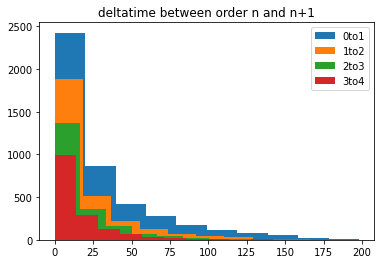

In [444]:
df=data[data.order_count==1]
plt.hist(df.timedelta)
df=data[data.order_count==2]
plt.hist(df.timedelta)
df=data[data.order_count==3]
plt.hist(df.timedelta)
df=data[data.order_count==4]
plt.hist(df.timedelta)
plt.legend(['0to1','1to2','2to3','3to4'])
plt.title('deltatime between order n and n+1')
plt.show()

## time delta for high value orders 

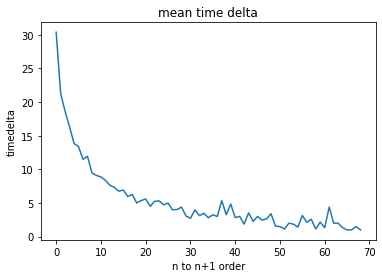

In [485]:
def timedelta_calc(n):
    return data[data.order_count==n].timedelta.describe()

mean_td=[]
for i in range(1,70):
    mean_td.append(timedelta_calc(i)['mean'])
plt.plot(mean_td)
plt.title('mean time delta')
plt.xlabel('n to n+1 order')
plt.ylabel('timedelta')
plt.show()